# Exploration 15. 문자를 읽을 수 있는 딥러닝 ✨✳️🔅🔓❤️‍🔥🧜‍♀️🪂🤩
## 다양한 OCR모델 비교하기
- Google OCR API, keras-ocr, Tesseract 

## 🪅 Step 1. 검증용 데이터셋 준비
텍스트의 모양 크기, 배치, 노이즈 등이 OCR에 미치는 영향을 알아보기 위해 각각의 텍스트 이미지 준비

### 검증용 데이터: 15장
이미지 소스 url : https://unsplash.com/s/photos/text

### (1) 이미지 가져오기

In [29]:
# import library
import matplotlib.pyplot as plt
import matplotlib.image as img
import keras_ocr
import os
import io
import cv2 

from google.cloud import vision
from pytesseract import Output
from pytesseract import pytesseract as pt
from PIL import Image, ImageDraw
from glob import glob

In [30]:
data_path = os.getenv('HOME')+'/aiffel/ocr_python/images/'
os.listdir(data_path)

['image12.jpg',
 'image1.jpg',
 'image6.jpg',
 'image4.jpg',
 'image8.jpg',
 'image2.jpg',
 'image11.jpg',
 'image13.jpg',
 'image14.jpg',
 'image9.jpg',
 'image3.jpg',
 'image15.jpg',
 'image7.jpg',
 'image5.jpg',
 'image10.jpg']

In [31]:
# 입력 이미지 경로 
images_path = glob(data_path+'*.jpg')
images_path

['/aiffel/aiffel/ocr_python/images/image12.jpg',
 '/aiffel/aiffel/ocr_python/images/image1.jpg',
 '/aiffel/aiffel/ocr_python/images/image6.jpg',
 '/aiffel/aiffel/ocr_python/images/image4.jpg',
 '/aiffel/aiffel/ocr_python/images/image8.jpg',
 '/aiffel/aiffel/ocr_python/images/image2.jpg',
 '/aiffel/aiffel/ocr_python/images/image11.jpg',
 '/aiffel/aiffel/ocr_python/images/image13.jpg',
 '/aiffel/aiffel/ocr_python/images/image14.jpg',
 '/aiffel/aiffel/ocr_python/images/image9.jpg',
 '/aiffel/aiffel/ocr_python/images/image3.jpg',
 '/aiffel/aiffel/ocr_python/images/image15.jpg',
 '/aiffel/aiffel/ocr_python/images/image7.jpg',
 '/aiffel/aiffel/ocr_python/images/image5.jpg',
 '/aiffel/aiffel/ocr_python/images/image10.jpg']

In [53]:
print(len(images_path))

15


### (2) 이미지 출력해보기

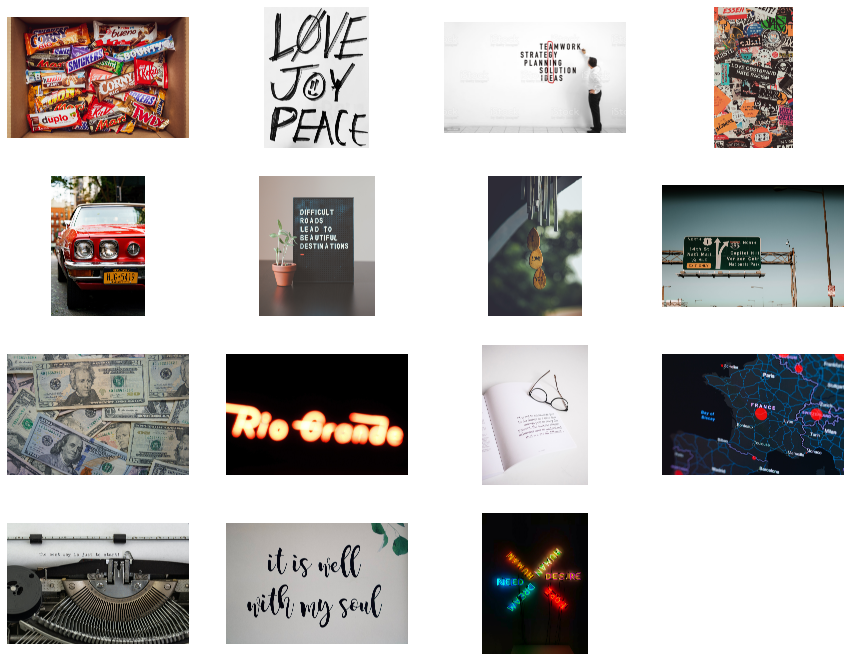

In [32]:
plt.figure(figsize=(15, 15))

for idx, image in enumerate(images_path):
    plt.subplot(5, 4, idx+1)
    im=img.imread(image)
    plt.imshow(im)
    plt.axis('off')

- 노이즈가 있는 것, rotate 되어 있는 것, 선명한 것, 흐린 것 등을 섞어 이미지를 골라보았다. 

## 🪅 Step 2. Google OCR API, Keras-ocr, Tesseract로 테스트 진행
### (1) Google OCR API

In [43]:
# def draw_boxes(image, bounds, color):
#     """Draw a border around the image using the hints in the vector list."""
#     draw = ImageDraw.Draw(image)

#     for bound in bounds:
#         draw.polygon([
#             bound.vertices[0].x, bound.vertices[0].y,
#             bound.vertices[1].x, bound.vertices[1].y,
#             bound.vertices[2].x, bound.vertices[2].y,
#             bound.vertices[3].x, bound.vertices[3].y], None, color)
#     return image

In [54]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('"{}"'.format(text.description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])
        
    print('bounds: {}'.format(','.join(vertices)))
    print('\n')
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [61]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [66]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for path in images_path:
    detect_text(path)
    print('-------------------------------------------------------------------------')

Texts:
"Beteratonal
Kinder
CORNY
BIG
ebueno
UTZ
Certified
x2
Og
Erdnuss-Schoko
01-2023
Bes ira fice
(Nak
21,5 g:
510 kJ
122 kcal
2.
RIEGEL
STK/KPL
6 %"
Mit dem Kauf vor
ako unte
OBOO 00 036ww mitka com
mbH Lindbergh-Ailee 1, CN 8152 Glattpark
Dervice: 00800 83 00 00 36 www.milka.com
Monde
Cons
ABOUNTYC
449kcal
1885AJ
ann enthalten: Erdnuss Neselnuss
eiss, Palmfet. Mileheweiss
28.5g
Sussmolkenpulver (aus Milch), fettarmer Kakao, Butterreir
Kakaomasse, Sannenblumenôl, Magermilchpulver, Milchz
(27%). Zutaten: Zucker, Glukosesirup, Kakaobutter, Vollmilch
DE Milchechokolade, getult mit feiner Candy-Creme (32%) und K
cal
02, 10 EUR/min. www.mondelezintemational.nl
enmalzextrakt, Emulgator (Sejalecith
600L/
mation
rmation/
tal 902 202 262 www.mill
1x
ssini
Osse:/Potion size: 51g
pro Packung:/Portions p
Masi
Nahrwert
581KJ
orm
Voedingsw
Information
cal
Información nutrico
SS
1x
=51g
961KJ
229kcal
SNICKERS
NEW
MORE INT
11%
Neste
TAST
CORNY
KERS
Kkan
prtlon
10%
aherentnN unoa za
od koun
rgie
2kJ

Texts:
"NEW YORK
HJG-5419
• EMPIRE STATE
"
"NEW"
"YORK"
"HJG-5419"
"•"
"EMPIRE"
"STATE"
bounds: (3984,5974),(4408,5972),(4409,6088),(3985,6090)


-------------------------------------------------------------------------
Texts:
"DIFFICULT
ROA DS
LE AD TO
BE A UTIFUL
DESTIN À TIONS
...
...
... ..
"
"DIFFICULT"
"ROA"
"DS"
"LE"
"AD"
"TO"
"BE"
"A"
"UTIFUL"
"DESTIN"
"À"
"TIONS"
"..."
"..."
"..."
".."
bounds: (1833,1382),(1833,1400),(1814,1400),(1814,1382)


-------------------------------------------------------------------------
Texts:
"LOVE
YOU
"
"LOVE"
"YOU"
bounds: (1424,3144),(1711,3130),(1718,3280),(1432,3295)


-------------------------------------------------------------------------
Texts:
"NORTH
1
1
NORTH
INTERSTATE
395
14th St
Natl Mall
Capitol HilI
Verizon Cntr
1/4 MILE
Nationals Park
EXIT ONLY
SNOW
EMERGENCY
ROUTE
NO PARKING
DURING
EMERGENCY
TOW WAY
"
"NORTH"
"1"
"1"
"NORTH"
"INTERSTATE"
"395"
"14th"
"St"
"Natl"
"Mall"
"Capitol"
"HilI"
"Verizon"
"Cntr"
"1/4"
"MILE"
"Nationals"
"P

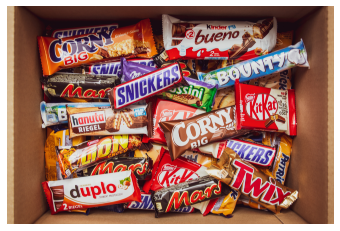

Texts:
"Beteratonal
Kinder
CORNY
BIG
ebueno
UTZ
Certified
x2
Og
Erdnuss-Schoko
01-2023
Bes ira fice
(Nak
21,5 g:
510 kJ
122 kcal
2.
RIEGEL
STK/KPL
6 %"
Mit dem Kauf vor
ako unte
OBOO 00 036ww mitka com
mbH Lindbergh-Ailee 1, CN 8152 Glattpark
Dervice: 00800 83 00 00 36 www.milka.com
Monde
Cons
ABOUNTYC
449kcal
1885AJ
ann enthalten: Erdnuss Neselnuss
eiss, Palmfet. Mileheweiss
28.5g
Sussmolkenpulver (aus Milch), fettarmer Kakao, Butterreir
Kakaomasse, Sannenblumenôl, Magermilchpulver, Milchz
(27%). Zutaten: Zucker, Glukosesirup, Kakaobutter, Vollmilch
DE Milchechokolade, getult mit feiner Candy-Creme (32%) und K
cal
02, 10 EUR/min. www.mondelezintemational.nl
enmalzextrakt, Emulgator (Sejalecith
600L/
mation
rmation/
tal 902 202 262 www.mill
1x
ssini
Osse:/Potion size: 51g
pro Packung:/Portions p
Masi
Nahrwert
581KJ
orm
Voedingsw
Information
cal
Información nutrico
SS
1x
=51g
961KJ
229kcal
SNICKERS
NEW
MORE INT
11%
Neste
TAST
CORNY
KERS
Kkan
prtlon
10%
aherentnN unoa za
od koun
rgie
2kJ

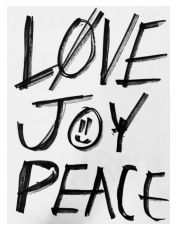

Texts:
"in if
"
"in"
"if"
bounds: (1608,2173),(1614,2180),(1604,2189),(1598,2183)




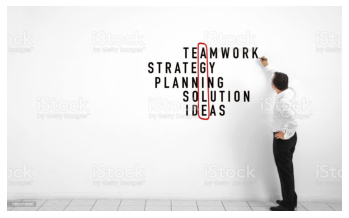

Texts:
"iStock
TEAMWORK
STRATEGY
PLANNING
SOLUTION
ock
iStock
iSto
Images"
by Getty Images"
by Getty
iStock
iStocEAS
iStock
by Getty Images"
by Getty Imag
by Gety images"
ock
iStock
iStock
iSto
Images"
by Getty Images"
by Getty Images
by Getty
1302419392
"
"iStock"
"TEAMWORK"
"STRATEGY"
"PLANNING"
"SOLUTION"
"ock"
"iStock"
"iSto"
"Images""
"by"
"Getty"
"Images""
"by"
"Getty"
"iStock"
"iStocEAS"
"iStock"
"by"
"Getty"
"Images""
"by"
"Getty"
"Imag"
"by"
"Gety"
"images""
"ock"
"iStock"
"iStock"
"iSto"
"Images""
"by"
"Getty"
"Images""
"by"
"Getty"
"Images"
"by"
"Getty"
"1302419392"
bounds: (16,599),(80,600),(80,608),(16,607)




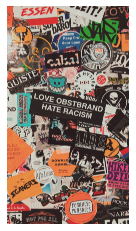

Texts:
"FUNKY4EVER
NOT FOR ALL
ESSEN
T!
row
DARO
ARARIS
Su
pertent
ON
Fireco
Keep fire
door open
SELLION
Safe
FANS
K
HEL
MY NAME IS
calkal
lerwa
SITTES BISSE
GUISTE
ON
UICY
kilosgraffiti
NON
(X)
STOP
VINTAGE
#har onnisc
MADRID
HOO
LOVE OBSTBRAND
RAP
END
HATE RACISM
IVD
RC
ONE TRICK PONY ULTRAS
ALD.S.
CRYSTAL PALAC
MA
ENJOY&
DIVISION
EIL DU
OCH SO
ICI INSEPARABILI DI SEMPRE
GDOPAMINEOREATON
cristinan
CH BIST
HWHAARA
DOWNLO
-COULD
ĐISAPPEAR
IN 2100
BUMBLE
HIKE
ARLO LAWTON
Obumble
date bff bizz
@f Schwanara
RIN
AJ's Lens
AFUNKY
PHOTOGRAPHY
AEVER
Grind
OFROM PEAK
TO PRECINC
THE
SCANERS
BUCK
elion
Feminist
VI
ROCK
sé & la Familia
UR
SIMONAMARC
PURSVLES
mul
R NOT FOR ALL
(LO
EMENISTISCHES
FAKT
5 QUETC)R DURCH BEALIN
14
CLUB
OASIS
STER
THE
S ודדNIט Sn
V44
SOCIAL MEDIA
ANIMAL REBELLION
"
"FUNKY4EVER"
"NOT"
"FOR"
"ALL"
"ESSEN"
"T!"
"row"
"DARO"
"ARARIS"
"Su"
"pertent"
"ON"
"Fireco"
"Keep"
"fire"
"door"
"open"
"SELLION"
"Safe"
"FANS"
"K"
"HEL"
"MY"
"NAME"
"IS"
"calkal"
"lerwa"
"SITTES"
"BISSE"
"

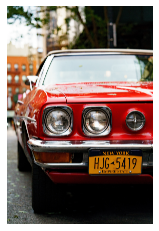

Texts:
"NEW YORK
HJG-5419
• EMPIRE STATE
"
"NEW"
"YORK"
"HJG-5419"
"•"
"EMPIRE"
"STATE"
bounds: (3984,5974),(4408,5972),(4409,6088),(3985,6090)




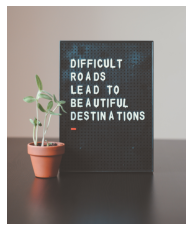

Texts:
"DIFFICULT
ROA DS
LE AD TO
BE A UTIFUL
DESTIN À TIONS
...
...
... ..
"
"DIFFICULT"
"ROA"
"DS"
"LE"
"AD"
"TO"
"BE"
"A"
"UTIFUL"
"DESTIN"
"À"
"TIONS"
"..."
"..."
"..."
".."
bounds: (1833,1382),(1833,1400),(1814,1400),(1814,1382)




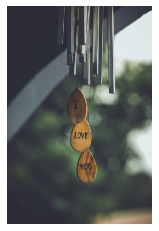

Texts:
"LOVE
YOU
"
"LOVE"
"YOU"
bounds: (1424,3144),(1711,3130),(1718,3280),(1432,3295)




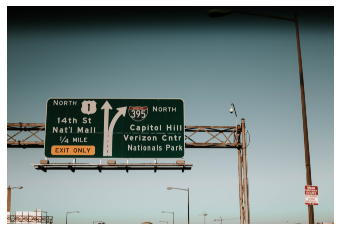

Texts:
"NORTH
1
1
NORTH
INTERSTATE
395
14th St
Natl Mall
Capitol HilI
Verizon Cntr
1/4 MILE
Nationals Park
EXIT ONLY
SNOW
EMERGENCY
ROUTE
NO PARKING
DURING
EMERGENCY
TOW WAY
"
"NORTH"
"1"
"1"
"NORTH"
"INTERSTATE"
"395"
"14th"
"St"
"Natl"
"Mall"
"Capitol"
"HilI"
"Verizon"
"Cntr"
"1/4"
"MILE"
"Nationals"
"Park"
"EXIT"
"ONLY"
"SNOW"
"EMERGENCY"
"ROUTE"
"NO"
"PARKING"
"DURING"
"EMERGENCY"
"TOW"
"WAY"
bounds: (5261,3409),(5297,3411),(5296,3422),(5261,3420)




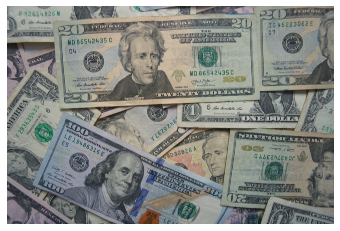

Texts:
"FEDERAL
20
IG 46223062E
G 7
188
20
NOTE
STATES
A 152
RESERVE
UNITED
THE
TEDST
OF
DSTAFES
F 92614826 M
OLIPRE
RESERVE
FEDERAI
AMARICA
20
USA
THIS NOTE IS LEGAL TENDER
FOR ALL DEBTS. PUBLIC AND PRIVATE
MD 86542435 C
Chme Exobedo Cahal
Treasurer of the United States.
1789
H1
D4
STATES
JACKBON
UNITED
MD 86542435 C
TWEN TY D OLLARS
6,
ERAL
RESERVE
Secretary of the Treasury.
THIS NOTE IS LEGAL TENDER
FOR ALL DEBTS, PUBLIC AND PRIVATE
SERIES 2013
Ea
3.
Treasurer of the United States.
WASHINGTON
A 3
JACKSON
ONED OLLA
C 536
TreasureroftheUnited States.
8428297A
NGAAR
STATES
SHV
SERIES 2009
Secretary of the Treasury.
100
ERA
TRLASURY
49030826 A
STATES
FEDERAL RESERVE NOTE
OF THE
LE19486316 E
JC 43742377 D
FW C 590
10
TO
10
E5
10
THE
10
100
NE
UNITED
NDRE DDOLIARS
UNTNED STATES
OFAMEAR COE
DFAYD I CA
RESERVE
100
SHNA
C 239
20
JULY 4, 1776.
Secretary of the Treasury.
las Bumatatae Rine
THIS NOTE IS LEGAL TENDER
FOR ALL DEBTS, PUBLIC AND PRIVATE
TE
Treasurer of the United States.
100
THE UN

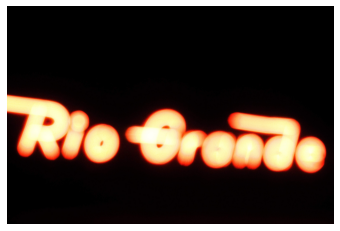

Texts:
"Rio Gronde
"
"Rio"
"Gronde"
bounds: (2259,1421),(4854,1583),(4792,2573),(2197,2411)




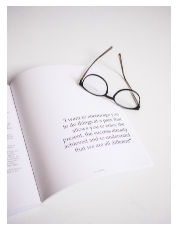

Texts:
"ple
was
was
"I want to encourage you
better
to do things at a pace that
allows you to enjoy the
side or
you can
ou have
present, the success already
achieved and to understand
that we are all different" .
when we
ntained.
at allows you
d and to
different
ey Phew that
es so that we
y and in turm
e so busy
nings happen.
g time with your
long run and
BUSINESS
"
"ple"
"was"
"was"
""I"
"want"
"to"
"encourage"
"you"
"better"
"to"
"do"
"things"
"at"
"a"
"pace"
"that"
"allows"
"you"
"to"
"enjoy"
"the"
"side"
"or"
"you"
"can"
"ou"
"have"
"present,"
"the"
"success"
"already"
"achieved"
"and"
"to"
"understand"
"that"
"we"
"are"
"all"
"different""
"."
"when"
"we"
"ntained."
"at"
"allows"
"you"
"d"
"and"
"to"
"different"
"ey"
"Phew"
"that"
"es"
"so"
"that"
"we"
"y"
"and"
"in"
"turm"
"e"
"so"
"busy"
"nings"
"happen."
"g"
"time"
"with"
"your"
"long"
"run"
"and"
"BUSINESS"
bounds: (1902,3474),(2050,3433),(2060,3472),(1913,3513)




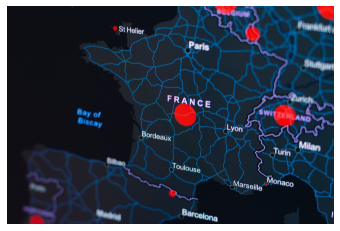

Texts:
"BELGIUM
Frankfurte
St Helier
Paris
Stuffgart
Zurich
FRANCE
SWITZERLAND
Lyon
Milan
Bay of
Biscay
Turin
Bordeaux
Toulouse
Monaco
Bibao
Marseille
Barcelona
Madrid
"
"BELGIUM"
"Frankfurte"
"St"
"Helier"
"Paris"
"Stuffgart"
"Zurich"
"FRANCE"
"SWITZERLAND"
"Lyon"
"Milan"
"Bay"
"of"
"Biscay"
"Turin"
"Bordeaux"
"Toulouse"
"Monaco"
"Bibao"
"Marseille"
"Barcelona"
"Madrid"
bounds: (1507,3405),(1919,3480),(1898,3594),(1486,3519)




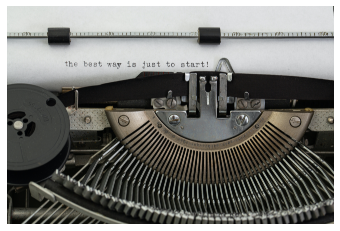

Texts:
"12101
14101
15101
1710 11
18|01
I 19101 1
the best way is just to start!
"
"12101"
"14101"
"15101"
"1710"
"11"
"18|01"
"I"
"19101"
"1"
"the"
"best"
"way"
"is"
"just"
"to"
"start!"
bounds: (3068,976),(3539,976),(3539,1075),(3068,1075)




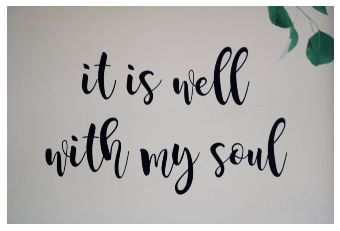

Texts:
"it is viell
pith my seul
"
"it"
"is"
"viell"
"pith"
"my"
"seul"
bounds: (3768,2125),(5154,2159),(5128,3190),(3743,3156)




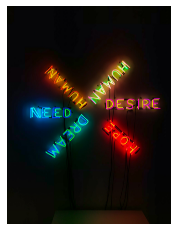

Texts:
"NEED
DES RE
FOPE
DREAM
HUMAN
HUMAN
"
"NEED"
"DES"
"RE"
"FOPE"
"DREAM"
"HUMAN"
"HUMAN"
bounds: (2173,1083),(1560,1727),(1410,1584),(2023,940)




In [65]:
import imageio

#위에서 정의한 OCR API 이용 함수 호출
for im in images_path :
    image = imageio.imread(im)
    plt.imshow(image)
    plt.axis("off")
    plt.show()    
    detect_text(im)

### (2) Keras-ocr

In [67]:
import matplotlib.pyplot as plt
import keras_ocr

In [68]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [71]:
images = [keras_ocr.tools.read(path) for path in images_path]
prediction_groups = [pipeline.recognize([path]) for path in images_path]

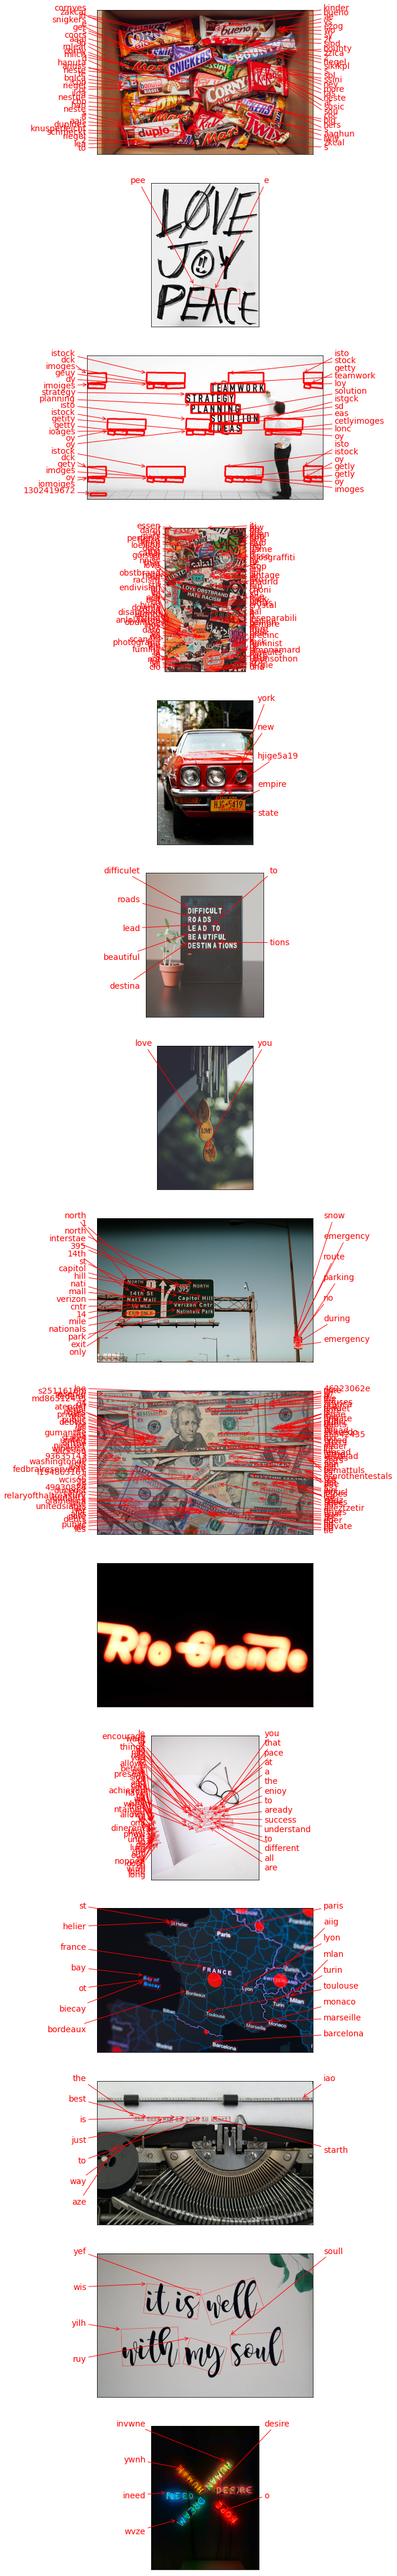

In [76]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

###  (3) Tesseract
- 구글에서 후원하는 OCR 오픈소스 라이브러리.
- 한 번에 이미지 내의 문자 검출(detection)과 인식(recognition)을 할 수 있음.

In [118]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [121]:
def crop_word_regions(image_path, output_path):
    s = os.path.splitext(image_path)
    s = os.path.split(s[0])
    name = s[1]
    output_path = output_path + name +'/'
    
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 11'
    image = Image.open(image_path)
    img = cv2.imread(image_path)
    
    d = pt.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
#     n_boxes = len(d['text'])
#     for i in range(n_boxes):
#         if int(d['conf'][i]) > 60:
#             (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#             img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     
    top_level = max(d['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(d['level'])):
        level = d['level'][i]
    
        if level == top_level:
            left = d['left'][i]
            top = d['top'][i]
            width = d['width'][i]
            height = d['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return name, cropped_image_path_list, img


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
output_path = work_dir + '/output/' 

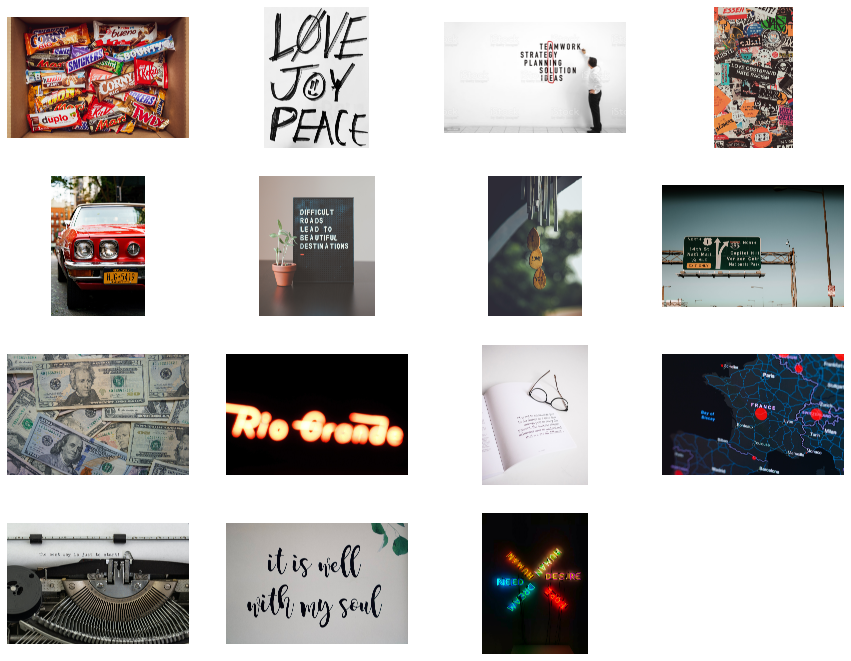

In [122]:
Tesser_dict = {}
img_dict = {}
plt.figure(figsize=(15, 15))

for idx, path in enumerate(images_path):    
    name, cropped_image_path_list, imgs = crop_word_regions(path, output_path)
    Tesser_dict[name] = cropped_image_path_list
    img_dict[name] = imgs
    plt.subplot(5, 4, idx+1)
    plt.imshow(imgs)
    plt.axis('off')

In [123]:
def recognize_images(cropped_image_path_list):
    test = []
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pt.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        test.append(recognized_data['text'].replace('\n', '').replace('\x0c',''))
        
    print(test)
    print("Done")

In [124]:
data_path = os.getenv('HOME')+'/aiffel/ocr_python/images/'
print(data_path)
print(os.listdir(data_path))
file_path = os.listdir(data_path)

/aiffel/aiffel/ocr_python/images/
['image12.jpg', 'image1.jpg', 'image6.jpg', 'image4.jpg', 'image8.jpg', 'image2.jpg', 'image11.jpg', 'image13.jpg', 'image14.jpg', 'image9.jpg', 'image3.jpg', 'image15.jpg', 'image7.jpg', 'image5.jpg', 'image10.jpg']


## 🪅 Step3. 테스트 결과 정리

### ✨ Google OCR API 사용 결과
- https://console.cloud.google.com/ 에 접속해서 사용 권한을 얻고 JSON파일을 가져오면 쉽게 사용이 가능하다.

- 사용 결과, 괜찮은 성능을 보이고 있다. 

- 물론 난해한 사진들은 그만큼 난해한 결과가 나오긴 했지만,| Google OCR API는 꽤나 일을 잘하고 있다는 생각이 들었다 🤩🤩🤩

### ✨ Keras-ocr 결과
- keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다. 
- 검출 모델로는 CRAFT를 사용하고, 인식 모델로는 CRNN을 사용한다.
- 검출된 결과는 Detect 성능이 매우 훌륭한 편이다. 
- 결과를 봤을 때 구글 API와 차이점은 텍스트가 많고 난해한 이미지일수록 검출이 더 잘 되었다는 점과 bounding box에 텍스트 결과까지 한 눈에 보여줘서 더욱 직관적이라는 점이다.
- 그러나 2번 이미지처럼 bounding box가 잘 안잡힌 곳에서는 텍스트가 제대로 인식이 안되는 경우와 10번 이미지처럼 조금 blur한 이미지는 아예 인식이 안되는 경우가 있었다. 🧜‍♀️

### ✨ Tesseract 사용 결과
- 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 많은 곳에서 사용되고 있으며, 한국어를 포함한 116개 국어를 지원한다.

- 검출 결과는 앞선 2가지 모델보다 성능이 떨어져 보인다. 특히, Detection을 잘하지 못한다. 
- 나중에 한국어로 인식을 해야 될때 고려하면 좋을 것 같다.

## 🪅 Step 4. 결과 분석과 결론 제시
#### ✨✨✨  3가지 모델 정확도 비교 ✨✨✨
1. Google OCR API, keras-ocr, Tessearact 순서

### 1. image12 - text 많은 경우

['BeteratonalKinderCORNYBIGebuenoUTZCertifiedx2OgErdnuss-Schoko01-2023Bes ira fice(Nak21,5 g:510 kJ122 kcal2.RIEGELSTK/KPL6 %"Mit dem Kauf vorako unteOBOO 00 036ww mitka commbH Lindbergh-Ailee 1, CN 8152 GlattparkDervice: 00800 83 00 00 36 www.milka.comMondeConsABOUNTYC449kcal1885AJann enthalten: Erdnuss Neselnusseiss, Palmfet. Mileheweiss28.5gSussmolkenpulver (aus Milch), fettarmer Kakao, ButterreirKakaomasse, Sannenblumenôl, Magermilchpulver, Milchz(27%). Zutaten: Zucker, Glukosesirup, Kakaobutter, VollmilchDE Milchechokolade, getult mit feiner Candy-Creme (32%) und Kcal02, 10 EUR/min. www.mondelezintemational.nlenmalzextrakt, Emulgator (Sejalecith600L/mationrmation/tal 902 202 262 www.mill1xssiniOsse:/Potion size: 51gpro Packung:/Portions pMasiNahrwert581KJormVoedingswInformationcalInformación nutricoSS1x=51g961KJ229kcalSNICKERSNEWMORE INT11%NesteTASTCORNYKERSKkanprtlon10%aherentnN unoa zaod kounrgie2kJkcalSUSTAINSOUDRIEGELMILCH& NUSS28 50Porton1,5Nestlezmengesene581KJ139kcalhanuta1

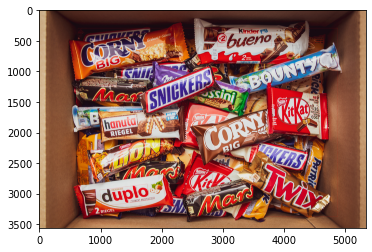

In [131]:
print(ocr_dict['image12'])
plt.imshow(ocr_img[0])

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

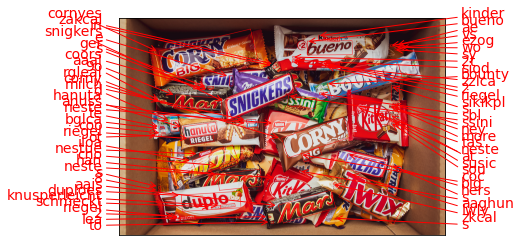

In [132]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[0], 
                                    predictions=prediction_groups[0][0])
print(a)

['y', 'wy', '/', '', '', '| i', '/', 'a‘...', '— és', '', '=a', '“7', '2hyevio', '', 'a', '.', '“~', '3', '*', 'Ys', '‘', '~', 'J', '*', 'Uae', 'Poe', '‘be', '>».', 'kh', '&,', '4°', 'IG ti', '-', 'a *', 'oN', 'iG', 'a', 'eal', 'va', '—', 'y /', 'rg', 'ne v-', 'i,', 'Ne', '|', 'e', 'y oD', 'bai', '', 'é', '—ererecer_4*', '_', 'tT', 'ah', 'eat)', '', ', s a7 o-', '¢', 'i \\e', 'eet Me ns |', '', '~¥', 'ST', 'Fa', 'es, |', 'wy', 'ys', '7a', 'a', 'Wi', '{', ':', 'sy', '7', '“2', 'Toei SST vos', 'ey', 'Way', '', 'Aue', 'i.', '', 'CR.', 'eS oP', '', '\\', '6', '/-', 'y', 'Bee', '-', '—-', '“lS', 'ff', 's', 'SAY |', 'YG', 'Ml', 'i .', '3', '4', 'ea', ':', '& cs ik', '', 'SUST', '', 'oy', '7', 'ee', 'Saik-', '\\', 'ai', '', '.', '', 'Coc', '\\', 'aan .', '‘', '-', '‘', '', 'al', 'E', ':', 'y', 'WN » > \\ .', '- 7 S', 'a', 'eo', 'o', 'nati', '3', "* '", 'A', 'yA', '', '4', '~~', '=', '4', 'XA"', '4', '}', '', '—', '', 'ee', '', '', '.', '**son0e', 'a IR oy', 'ye =', '', '—--/,', '1s', '', 'Mll

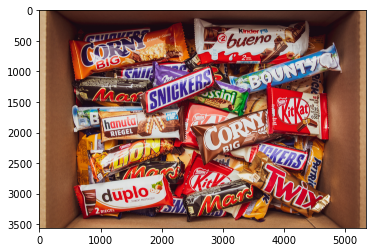

In [133]:
plt.imshow(img_dict['image12'])
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(Tesser_dict['image12'])

### 2. image9 - text blur한 경우

['Rio Gronde', 'Rio', 'Gronde']


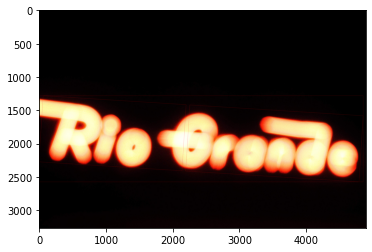

In [134]:
print(ocr_dict['image9'])
plt.imshow(ocr_img[9])

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

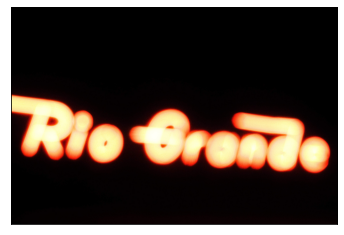

In [135]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[9], 
                                    predictions=prediction_groups[9][0])
print(a)

['| 3 | .']
Done


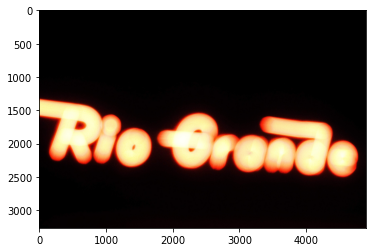

In [136]:
plt.imshow(img_dict['image9'])
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(Tesser_dict['image9'])

### 3. image10 - text rotate되어 있는 경우

['NEEDDES REFOPEDREAMHUMANHUMAN', 'NEED', 'DES', 'RE', 'FOPE', 'DREAM', 'HUMAN', 'HUMAN']


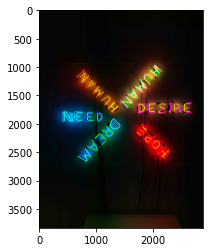

In [137]:
print(ocr_dict['image10'])
plt.imshow(ocr_img[14])

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

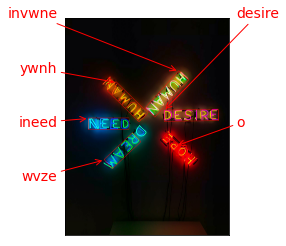

In [138]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[14], 
                                    predictions=prediction_groups[14][0])
print(a)

['1', 'iS', 'hy']
Done


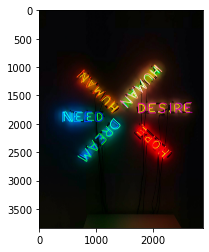

In [140]:
plt.imshow(img_dict['image10'])
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(Tesser_dict['image10'])

### 결론적으로,
Google OCR API, keras-ocr, Tessearact 순서로 성능이 좋음을 볼 수 있었으며, keras-ocr가 다른 것에 비해 우수한 점은 bounding box가 직관적이라는 점과 글씨가 많을 때도 다 detect를 한다는 점이다. 

## 🪅 회고 

1. 이미지 detection(검출)과 recognition(인식)의 차이를 알게된 유익하고 재밌는 노드였다. 보통은 이미지 또는 자연어 둘 중 하나를 다루지만 이번엔 한꺼번에 다룬다는 점이 좋았고, cs231n에서 배웠ejs  CNN과 RNN을 결합한 CRNN 모델을 직접 실습해볼 수 있어 좋았다. 


2. API들마다 다른 성능과 특징을 가지고 있다는 점도 직접 해보면서 파악할 수 있어서 좋았다.


3. unsplash에서 이미지 데이터를 다운로드할 때 일부러 다양하게 가져온 것이 이후 성능 평가를 할 때, 다양한 관점으로 볼 수 있게 해주어 좋았다.


4. 지금은 이미지 10개로만 했지만 다음에는 더 많은 데이터를 가지고 해보고 싶다.


5. Google OCR API가 잘만들어진 것은 사실이나 정확도 향상을 위해 무엇을 할 수 있는지에 대해서도 알아보고 싶다. 🔓